In [2]:
import Pkg; Pkg.activate(".")

  Activating project at `~/SAFT_ML/WinterParameters`


In [3]:
using CSV, DataFrames, Plots, MolecularGraph, Graphs
import PyPlot; const plt = PyPlot ;

[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends.jl:43
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
[ Info: Precompiling GeometryBasicsExt [b238bd29-021f-5edc-8b0e-16b9cda5f63a]


In [4]:
data = CSV.read("PC-SAFT-Parameter.csv",DataFrame,header=2) ;
molecular_weights = [standard_weight(smilestomol(x),3) for x in data.SMILES0] ;
name_strings = [string(a) for a in data.names] ;
data.MolecularWeight = molecular_weights ;
data.names = name_strings ;

# data

In [5]:
# Sort by a functional group
filtered_data_ketones = filter(row -> occursin("C(=O)C", row.SMILES0), data) ;
filtered_data_alcohols = filter(row -> occursin("CO", row.SMILES0), data) ;
filtered_data_amines = filter(row -> occursin("CN", row.SMILES0), data) ;
filtered_data_aromatics = filter(row -> occursin("c1ccccc1", row.SMILES0), data) ;

In [6]:
# Sort by a specific molecule name or group
filtered_data_specific = filter(row -> occursin("butane", row.names), data) ;
filtered_data_specific = sort(filtered_data_specific, :MolecularWeight) ;
data = sort(data, :MolecularWeight) 


Row,names,SMILES0,m,sigma,epsilon_k,mu,kappa_ab,epsilon_k_ab,MolecularWeight
,String,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,methane,C,1.5181,3.2367,157.952,0.201893,0.0,0.0,16.043
2,deuteriomethane,[2H]C,1.37027,3.19036,125.953,0.416519,0.0,0.0,17.049
3,dideuteriomethane,[2H]C[2H],1.32454,3.00778,131.652,0.127655,0.0,0.0,18.055
4,trideuteriomethane,[2H]C([2H])[2H],1.32091,3.09903,130.451,0.366143,0.0,0.0,19.061
5,tetradeuteriomethane,[2H]C([2H])([2H])[2H],1.36976,3.18321,125.829,0.384523,0.0,0.0,20.067
6,acetylene,C#C,1.74507,3.13734,190.311,0.0,0.0,0.0,26.038
7,formonitrile,C#N,2.37591,2.77417,243.695,1.9451,0.0,0.0,27.026
8,missing,[H]1[BH2][H][BH2]1,2.32015,3.53127,179.65,0.0,0.0,0.0,27.668
9,carbon monoxide,[C-]#[O+],1.20545,3.36165,96.1117,0.102474,0.0,0.0,28.01


In [7]:
# m	sigma	epsilon_k	mu	kappa_ab	epsilon_k_ab

parameter = "epsilon_k_ab"

scatter(filtered_data_amines.MolecularWeight, filtered_data_amines[!, parameter], label="Amines",dpi=400)
scatter!(filtered_data_ketones.MolecularWeight, filtered_data_ketones[!, parameter], label="Ketones")
scatter!(filtered_data_alcohols.MolecularWeight, filtered_data_alcohols[!, parameter], label="Alcohols")
scatter!(filtered_data_aromatics.MolecularWeight, filtered_data_aromatics[!, parameter], label="Aromatics")
xlabel!("Molecular Weight [g/mol]")
ylabel!(parameter)
savefig("$parameter.png")

"/home/mgadaloff/SAFT_ML/WinterParameters/epsilon_k_ab.png"

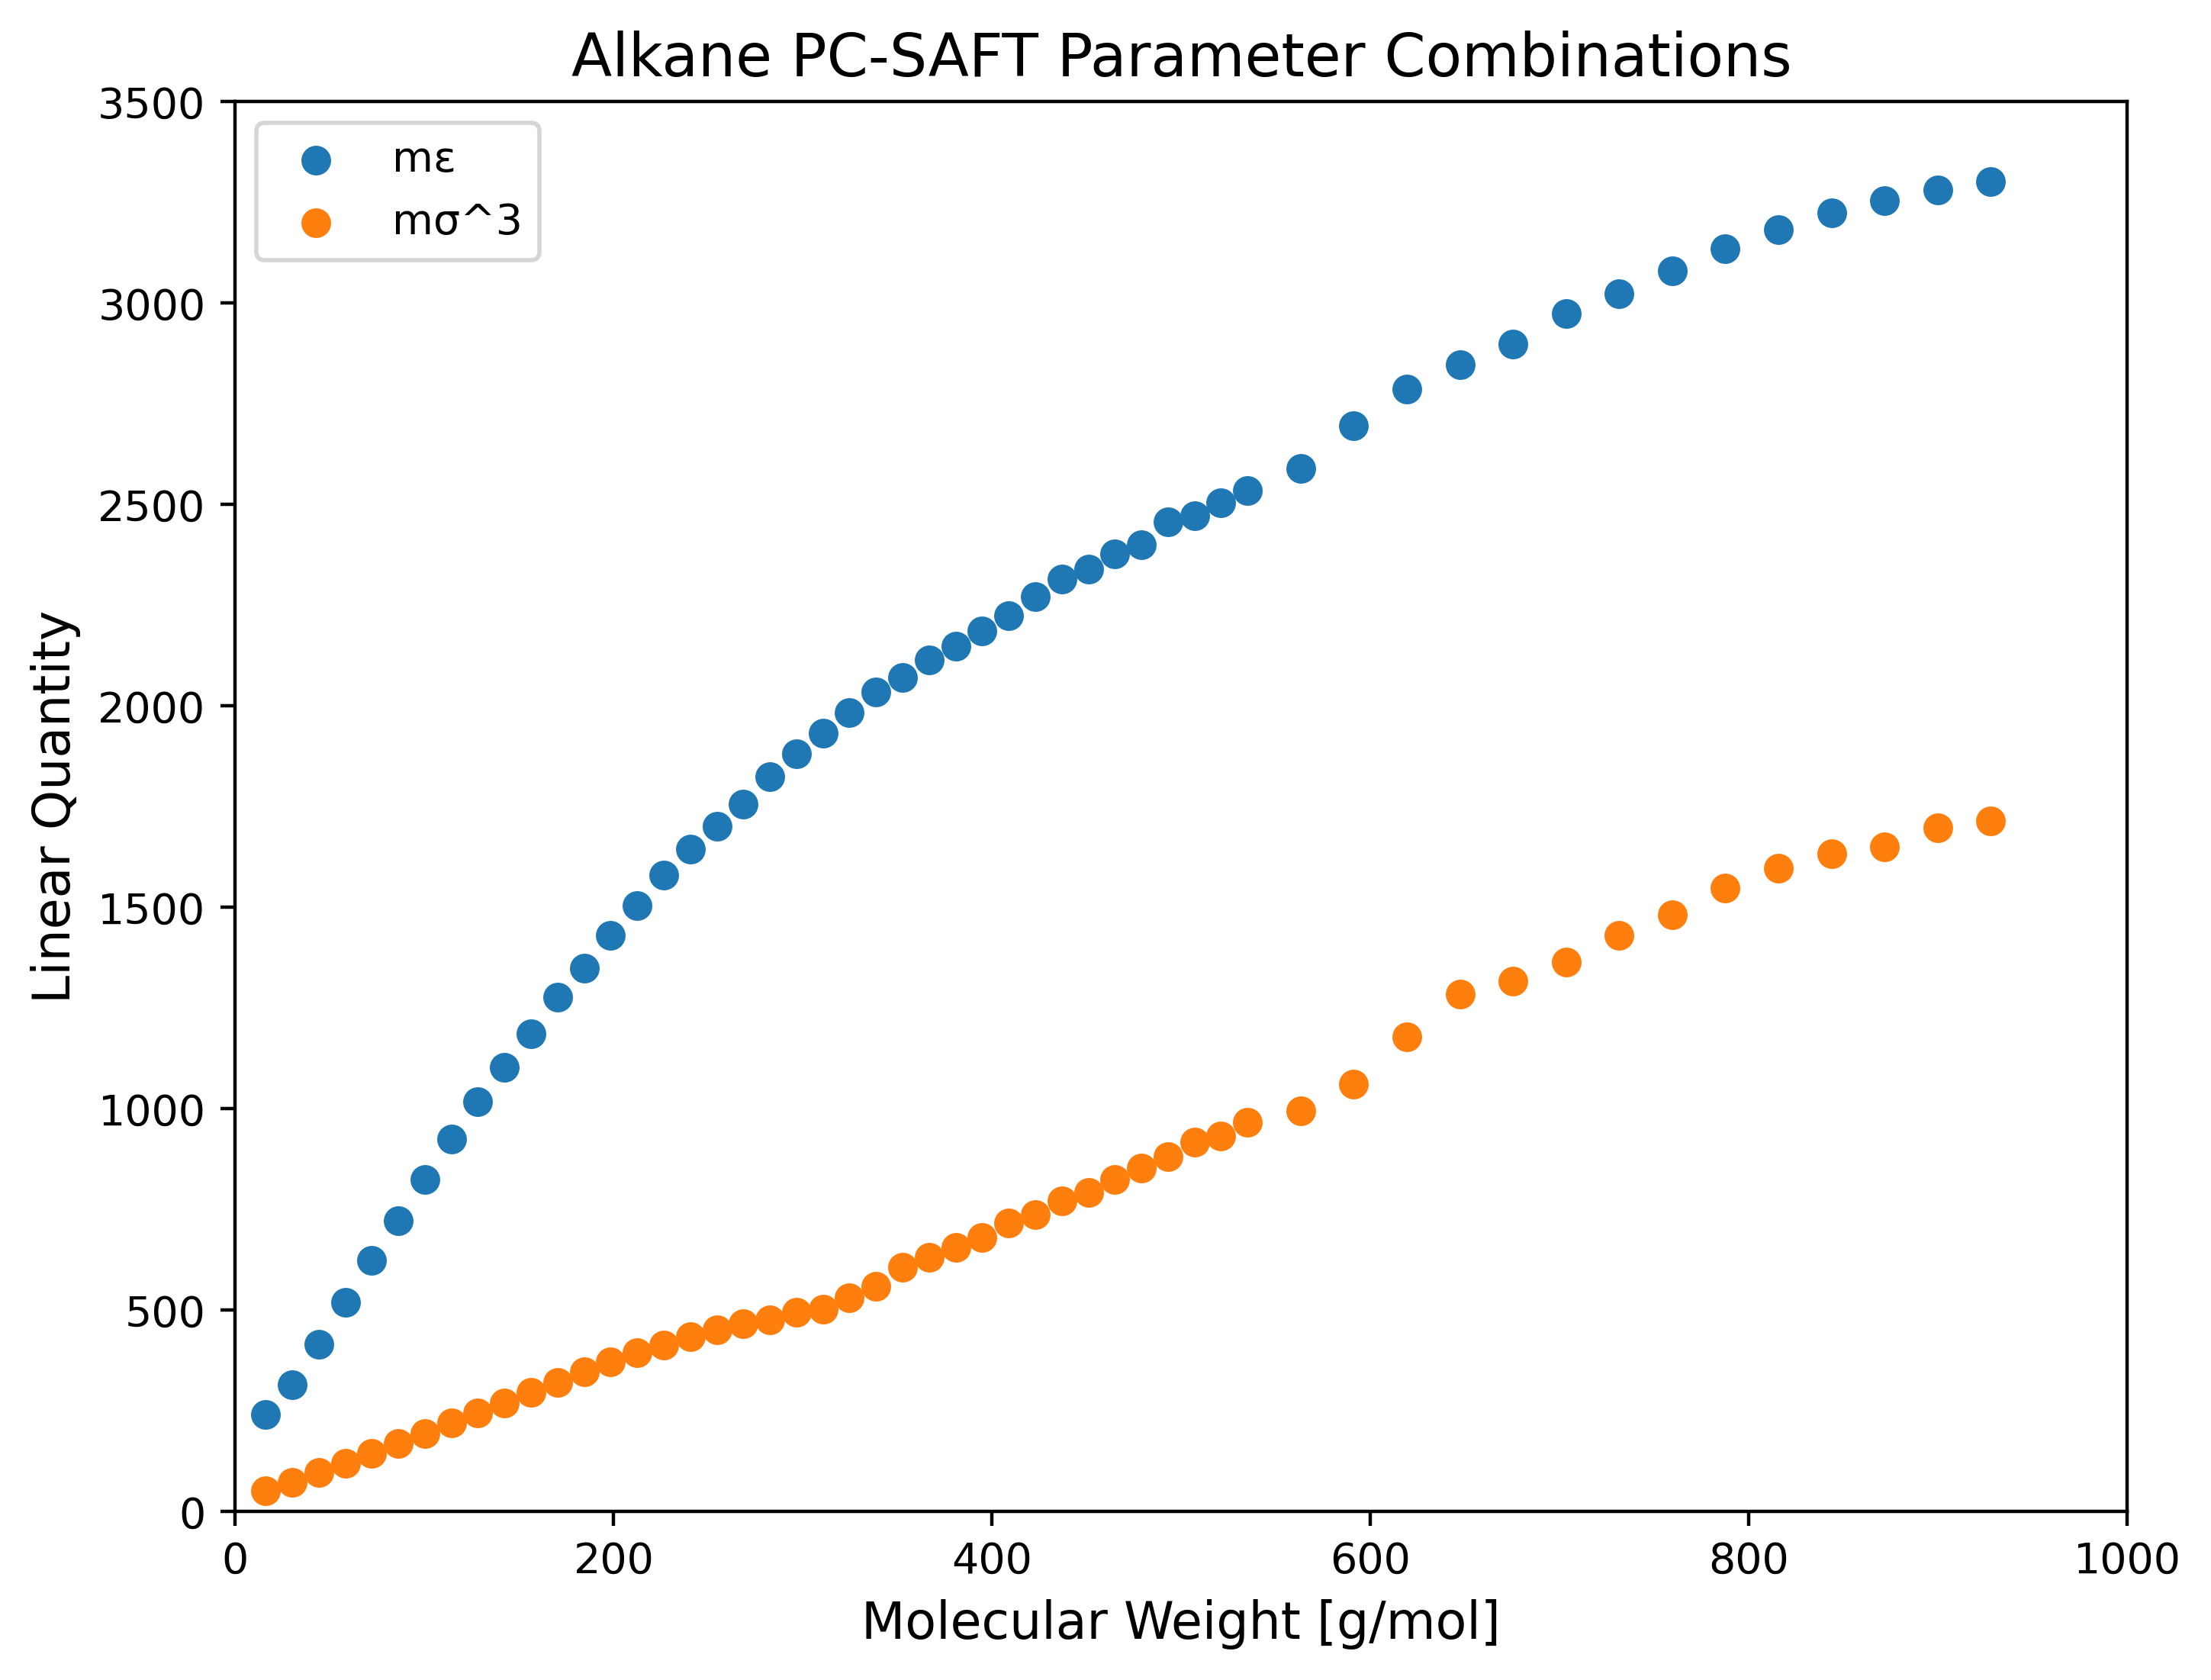

In [8]:
contains_only_c(name) = all(letter -> lowercase(letter) == 'c', name) ;
filtered_data_alkanes = filter(row -> contains_only_c(row.SMILES0), data) ;

filtered_data_alkanes = sort(filtered_data_alkanes, :MolecularWeight) ;

#scatter(filtered_data_alkanes.MolecularWeight, filtered_data_alkanes.m, label="Alkanes")

m_sigmacubed = []
for (a, b) in zip(filtered_data_alkanes.m, filtered_data_alkanes.sigma)
    push!(m_sigmacubed, a*b^3)
end

m_epsilon = []
for (a, b) in zip(filtered_data_alkanes.m, filtered_data_alkanes.epsilon_k)
    push!(m_epsilon, a*b)
end

plt.figure(figsize=(8, 6), dpi=400)

plt.scatter(filtered_data_alkanes.MolecularWeight, m_epsilon, label="mε")
plt.scatter(filtered_data_alkanes.MolecularWeight, m_sigmacubed, label="mσ^3")
plt.xlabel("Molecular Weight [g/mol]",fontsize=12)
plt.ylabel("Linear Quantity",fontsize = 12)
plt.legend(["mε","mσ^3"])
plt.title("Alkane PC-SAFT Parameter Combinations",fontsize=14)
plt.xlim(0,1000)
plt.ylim(0,3500) ;

plt.savefig("Linear_Quantities_Winter.png",dpi=400)


# sigmacubed lambda epsilon

In [9]:
println(filtered_data_alkanes)


52×9 DataFrame
 Row │ names              SMILES0                            m        sigma    epsilon_k  mu        kappa_ab     epsilon_k_ab  MolecularWeight 
     │ String             String                             Float64  Float64  Float64    Float64   Float64      Float64       Float64         
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ methane            C                                  1.5181   3.2367     157.952  0.201893  0.0                0.0              16.043
   2 │ ethane             CC                                 1.7177   3.46452    182.78   0.0       0.0                0.0              30.07
   3 │ propane            CCC                                1.97913  3.64257    209.325  0.0       0.0                0.0              44.097
   4 │ butane             CCCC                               2.3058   3.72772    225.057  0.0       0.0                0.0   

In [10]:
contains_only_c(name) = all(letter -> (lowercase(letter) == 'c') && ('='), name) ;
filtered_data_alkanes = filter(row -> contains_only_c(row.SMILES0), data) ;


LoadError: TypeError: non-boolean (Char) used in boolean context